In [10]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [11]:
data_path='/home/m21_huangzijun/pythonprojs/sichuan'

In [12]:
user=pd.read_csv(data_path+'/Data2/data_user.csv')
voc2=pd.read_csv(data_path+'/Data2/data_voc2.csv')
voc2['start_datetime']=pd.to_datetime(voc2['start_datetime'])

In [13]:
contact=defaultdict(set)

In [14]:
caller=voc2['phone_no_m'].tolist()
callee=voc2['opposite_no_m'].tolist()
calltime=voc2['start_datetime'].to_list()

In [15]:
fraud_user=set(user.loc[user['label']==1]['user'])

In [16]:
for i in range(len(caller)):
    contact[caller[i]].add(callee[i])
    

In [17]:
comm_fraud=defaultdict(set)

In [18]:
fraud_user_list=list(fraud_user)
for fraudster in fraud_user_list:
    for fraudster2 in fraud_user_list:
        if fraudster2==fraudster:continue
        comm_fraud[fraudster]=comm_fraud[fraudster] | (contact[fraudster]&contact[fraudster2]) 

In [21]:
n_comm_fraud=[]
for v in comm_fraud.values():
    n_comm_fraud.append(len(v))

In [33]:
n_comm_fraud_top=[]
threshhold=20
for n in n_comm_fraud:
    if n<=threshhold:
        n_comm_fraud_top.append(n)

In [38]:
n_comm_fraud_pd=pd.Series(n_comm_fraud_top_rate)
writer=pd.ExcelWriter('n_common_fraud_top_rate.xlsx')
n_comm_fraud_pd.to_excel(writer,'sheet_1')
writer.save()
writer.close()

In [36]:
n_comm_fraud_top_rate=[0 for i in range(threshhold+1)]
for value in n_comm_fraud_top:
    n_comm_fraud_top_rate[value]+=1
for j in range(len(n_comm_fraud_top_rate)):
    n_comm_fraud_top_rate[j]/=len(n_comm_fraud_top)

In [37]:
n_comm_fraud_top_rate

[0.10062893081761007,
 0.10613207547169812,
 0.09512578616352202,
 0.09827044025157233,
 0.07154088050314465,
 0.07075471698113207,
 0.05188679245283019,
 0.04874213836477988,
 0.041666666666666664,
 0.049528301886792456,
 0.03773584905660377,
 0.027515723270440252,
 0.03380503144654088,
 0.025157232704402517,
 0.02358490566037736,
 0.0220125786163522,
 0.020440251572327043,
 0.019654088050314465,
 0.025943396226415096,
 0.020440251572327043,
 0.009433962264150943]

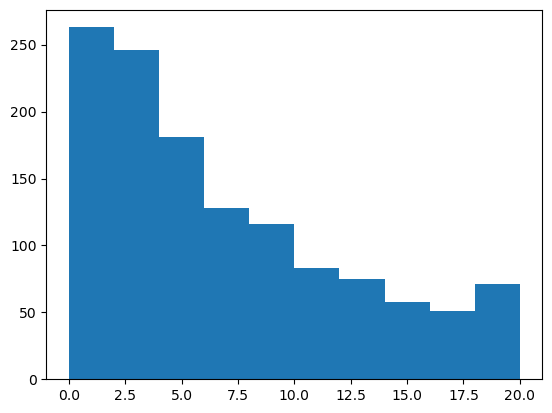

In [34]:
plt.hist(n_comm_fraud_top,bins=10)
plt.show()

In [25]:
len(fraud_user)

1752

In [20]:
EDGE_THRESHOLD=7

In [26]:
for i in range(len(caller)):
    if caller[i] not in fraud_user:continue
    j=i-1
    co=False
    while j>=0 and (calltime[i]-calltime[j]).days<=EDGE_THRESHOLD and (not co):
        if (caller[j]==callee[i] and callee[j] in fraud_user) or (callee[j]==callee[i] and caller[j] in fraud_user):
            cooperate_dict[caller[i]]['co']+=1
            co=True
            
        j-=1
    j=i+1
    while j<len(caller) and (calltime[j]-calltime[i]).days<=EDGE_THRESHOLD and (not co):
        if (caller[j]==callee[i] and callee[j] in fraud_user) or (callee[j]==callee[i] and caller[j] in fraud_user):
            cooperate_dict[caller[i]]['co']+=1
            co=True
            
        j+=1
    if not co:
        cooperate_dict[caller[i]]['self']+=1
    


KeyboardInterrupt: 

In [26]:
contact_dict=defaultdict(set)

In [29]:
for r in zip(voc2['phone_no_m'],voc2['opposite_no_m'],voc2['start_datetime']):
    contact_dict[int(r[0])].add(int(r[1]))


In [28]:
# test
contact_dict[1175311]

{958464,
 540674,
 843781,
 638982,
 1212422,
 393225,
 335884,
 1253388,
 933905,
 1171477,
 942114,
 483377,
 57394,
 1032241,
 57397,
 122937,
 98365,
 483391,
 344133,
 352331,
 614476,
 491598,
 581714,
 221267,
 278614,
 1089637,
 188524,
 24684,
 1048694,
 458870,
 901241,
 1179773,
 319614,
 426112,
 132,
 729237,
 106646,
 508058,
 712862,
 434336,
 139430,
 1220779,
 311478,
 155833,
 221369,
 254148,
 65738,
 8395,
 1245403,
 1138909,
 303331,
 106730,
 803052,
 1261809,
 467188,
 131317,
 1147132,
 1016061,
 737537,
 696580,
 270598,
 745738,
 639246,
 385295,
 942364,
 246053,
 213292,
 1024303,
 516400,
 308,
 1212746,
 393557,
 762198,
 999767,
 155990,
 983389,
 434527,
 819560,
 737647,
 360816,
 737654,
 713082,
 713089,
 377231,
 278930,
 631198,
 885156,
 655789,
 516529,
 770482,
 360883,
 25015,
 156088,
 1130936,
 1065403,
 385467,
 516546,
 901571,
 860614,
 1262023,
 41415,
 49609,
 926167,
 98786,
 975331,
 1049066,
 369134,
 664059,
 1114619,
 1237509,
 60674

In [85]:
comm_fraud_graph=nx.read_adjlist('../Data2/comm_friend_graph_1.adjlist',nodetype=int)
comm_fraud_graph2=nx.read_adjlist('../Data2/comm_friend_graph_2.adjlist',nodetype=int)
comm_fraud_graph3=nx.read_adjlist('../Data2/comm_friend_graph_3.adjlist',nodetype=int)


In [87]:
list_user=list(user['user'])

In [88]:
type(list_user[0])

int

In [89]:
user2label=dict(zip(user['user'],user['label']))

In [90]:
disassort_rates=list()
disassort_rates2=list()
disassort_rates3=list()

In [91]:
disassort_area=defaultdict(int)

In [92]:
disassort_area2=defaultdict(int)
disassort_area3=defaultdict(int)

In [99]:
disassort_area_normal=defaultdict(int)
disassort_area_fraud=defaultdict(int)
disassort_area2_fraud=defaultdict(int)
disassort_area2_normal=defaultdict(int)
disassort_area3_normal=defaultdict(int)
disassort_area3_fraud=defaultdict(int)

In [100]:
for u in comm_fraud_graph.nodes:

    neighbors=list(comm_fraud_graph.adj[u])
    disassor_count=0
    label=user2label[u]

    if len(neighbors)==0:
        if label==0:disassort_area_normal['NN']+=1
        elif label==1:disassort_area_fraud['NN']+=1
    else:

        for neigh in neighbors:
            if user2label[neigh]!=user2label[u]:
                disassor_count+=1
        if label==0:disassort_area_normal[str(int(disassor_count/len(neighbors)*10))]+=1
        elif label==1:disassort_area_fraud[str(int(disassor_count/len(neighbors)*10))]+=1
    # disassort_rates.append(disassor_count/len(neighbors) if len(neighbors)>0 else -1)
    

In [101]:
for u in comm_fraud_graph2.nodes:
    neighbors=list(comm_fraud_graph2.adj[u])
    disassor_count=0
    label=user2label[u]
    if len(neighbors)==0:
        if label==0:disassort_area2_normal['NN']+=1
        elif label==1:disassort_area2_fraud['NN']+=1
    else:

        for neigh in neighbors:
            if user2label[neigh]!=user2label[u]:
                disassor_count+=1
        if label==0:disassort_area2_normal[str(int(disassor_count/len(neighbors)*10))]+=1
        elif label==1:disassort_area2_fraud[str(int(disassor_count/len(neighbors)*10))]+=1
    # disassort_rates2.append(disassor_count/len(neighbors) if len(neighbors)>0 else -1)
    

In [102]:
for u in comm_fraud_graph3.nodes:
    neighbors=list(comm_fraud_graph3.adj[u])
    disassor_count=0
    label=user2label[u]
    if len(neighbors)==0:
        if label==0:disassort_area3_normal['NN']+=1
        elif label==1:disassort_area3_fraud['NN']+=1
    else:

        for neigh in neighbors:
            if user2label[neigh]!=user2label[u]:
                disassor_count+=1
        if label==0:disassort_area3_normal[str(int(disassor_count/len(neighbors)*10))]+=1
        elif label==1:disassort_area3_fraud[str(int(disassor_count/len(neighbors)*10))]+=1
    # disassort_rates3.append(disassor_count/len(neighbors) if len(neighbors)>0 else -1)
    

In [103]:
disassort_area_normal

defaultdict(int,
            {'4': 272,
             '3': 851,
             '2': 1459,
             '1': 710,
             '0': 368,
             'NN': 201,
             '5': 20,
             '6': 18,
             '10': 25,
             '7': 1})

In [104]:
disassort_area_fraud

defaultdict(int,
            {'6': 430,
             '7': 267,
             '5': 363,
             '4': 21,
             '8': 62,
             '9': 5,
             '1': 63,
             '0': 330,
             '3': 43,
             '2': 40,
             '10': 9,
             'NN': 119})

In [105]:
disassort_area2_normal

defaultdict(int,
            {'NN': 790,
             '10': 35,
             '3': 612,
             '2': 863,
             '1': 864,
             '4': 87,
             '5': 74,
             '0': 565,
             '6': 26,
             '7': 9})

In [106]:
disassort_area2_fraud

defaultdict(int,
            {'10': 17,
             '6': 388,
             '7': 162,
             '8': 51,
             '5': 73,
             '2': 33,
             '0': 507,
             '4': 45,
             '3': 62,
             '9': 9,
             '1': 29,
             'NN': 376})

In [107]:
disassort_area3_normal

defaultdict(int,
            {'NN': 1526,
             '4': 126,
             '5': 92,
             '1': 678,
             '3': 287,
             '6': 34,
             '2': 521,
             '0': 586,
             '7': 10,
             '10': 61,
             '8': 4})

In [108]:
disassort_area3_fraud

defaultdict(int,
            {'5': 130,
             '7': 94,
             '2': 44,
             '6': 113,
             'NN': 648,
             '8': 44,
             '4': 48,
             '3': 55,
             '1': 28,
             '0': 510,
             '10': 32,
             '9': 6})

In [97]:
disassort_area3

defaultdict(int,
            {'NN': 2174,
             '4': 174,
             '5': 222,
             '7': 104,
             '1': 706,
             '3': 342,
             '6': 147,
             '2': 565,
             '0': 1096,
             '8': 48,
             '10': 93,
             '9': 6})

In [98]:
disassort_area2

defaultdict(int,
            {'NN': 1166,
             '10': 52,
             '3': 674,
             '6': 414,
             '2': 896,
             '1': 893,
             '7': 171,
             '4': 132,
             '5': 147,
             '0': 1072,
             '8': 51,
             '9': 9})

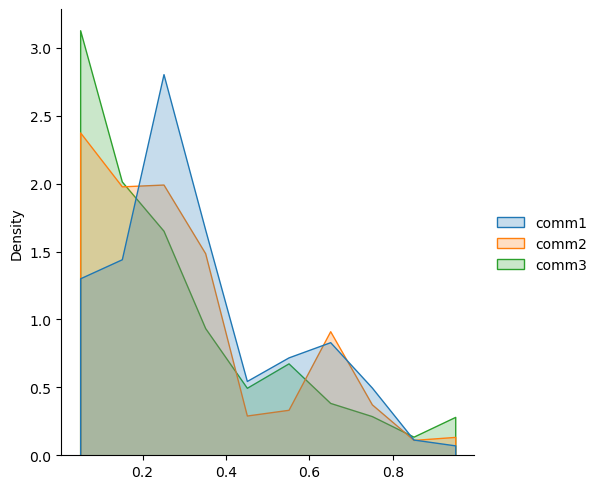

In [43]:
sns.displot(diss,bins=10,element='poly',
            stat="density",common_norm=False)


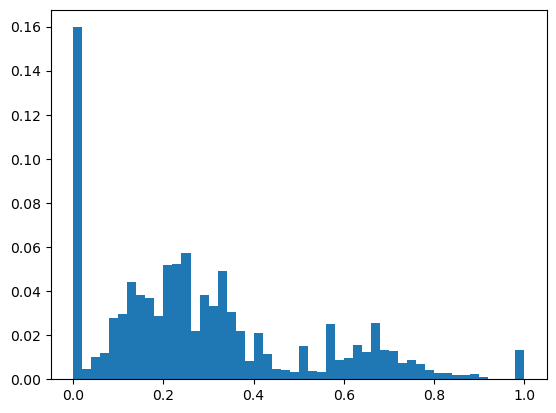

In [53]:
plt.cla()
weights=np.ones_like(disassort_rates)/float(len(disassort_rates))
plt.hist(disassort_rates,bins=50,weights=weights)
plt.show()

In [74]:
# test
g1=nx.Graph()
g1.add_nodes_from([1,2,3])
g1.add_edge(1,2)
nx.write_adjlist(g1,'../Data2/test.adjlist')

In [77]:
# test
g1=nx.read_adjlist('../Data2/test.adjlist')

In [79]:
#test
g1.edges

EdgeView([('1', '2')])